In [2]:

%%javascript

IPython.keyboard_manager.command_shortcuts.add_shortcut('Ctrl-k', {
    help : 'move up selected cells',
    help_index : 'jupyter-notebook:move-selection-up',
    handler : function (event) {
        IPython.notebook.move_selection_up();
        return false;
    }}
);

IPython.keyboard_manager.command_shortcuts.add_shortcut('Ctrl-j', {
    help : 'move down selected cells',
    help_index : 'jupyter-notebook:move-selection-down',
    handler :  function (event) {
        IPython.notebook.move_selection_down();
        return false;
    }}
);

<IPython.core.display.Javascript object>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import inline as inline

%matplotlib inline

pd.set_option('display.width', 400)
pd.set_option('display.max_columns', 23)
pd.set_option('display.max_rows', 100)

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

df = pd.read_csv('events.csv')


C:\Users\nacho\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\interactiveshell.py:2705: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.describe()        

,timestamp,event,person,url,sku,model,condition,storage,color,skus,search_term,staticpage,campaign_source,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
count,1011288,1011288,1011288,82756,563838.0,564284,563836,563836,563836,221699,48967,3598,82796,50957,87378,87378,87378,87378,87378,87378,87378,87378,87378
unique,793805,11,27624,227,3885.0,202,5,8,63,35310,5851,14,24,4,7,2,1939,93,46,4,282,121,343
top,2018-05-15 15:56:06,viewed product,71492f2b,/,2830.0,iPhone 6,Bom,16GB,Preto,"2820,6706,6720,2750,6649,7251,6663,12604,7224,...",Iphone,CustomerService,google,Google,Paid,Returning,Unknown,Sao Paulo,Brazil,Smartphone,360x640,Windows 7,Chrome 66.0
freq,11,528931,2771,28323,4311.0,50916,243014,190833,132960,594,1207,1528,58153,50240,44193,60480,15819,24996,84308,44239,30009,19675,22611


In [5]:
df_campaign = df[df.campaign_source.notnull()][['person', 'campaign_source']]
campaign_persons = df_campaign['person']                #  SERIE CON PERSONAS QEUE ESTA
df_campaign_users = df.loc[df['person'].isin(campaign_persons), :]
df_campaign_users_buys = df_campaign_users.loc[df['event'] == 'conversion']

Top Campañas

In [6]:
df_campaign['campaign_source'].value_counts()

google              58153
criteo               9694
rtbhouse             8550
zanox                1673
emblue               1352
FacebookAds           764
afilio                692
bing                  484
voxus                 432
rakuten               310
indexa                154
buscape               141
manifest              126
Facebook               77
datacrush              60
blog                   37
afiliado               34
yotpo                  25
mercadopago            18
FacebookSocial          8
MARKETING SOCIAL        7
onsite                  3
Google Social           1
socialmedia             1
Name: campaign_source, dtype: int64

##                     Google

In [7]:
df_google_persons = df_campaign.loc[df_campaign['campaign_source'] == 'google']
person_google = df_google_persons['person']
df_google = df.loc[df['person'].isin(person_google), :]
df_google = df.loc[df['event'] != 'ad campaign hit', :]


In [8]:

df_google.describe()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,search_term,staticpage,campaign_source,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
count,928461,928461,928461,0.0,563838.0,564284,563836,563836,563836,221699,48967,3598,0.0,50957,87378,87378,87378,87378,87378,87378,87378,87378,87378
unique,778132,10,27624,0.0,3885.0,202,5,8,63,35310,5851,14,0.0,4,7,2,1939,93,46,4,282,121,343
top,2018-06-11 17:09:47,viewed product,6b07be7b,NaN,2830.0,iPhone 6,Bom,16GB,Preto,"2820,6706,6720,2750,6649,7251,6663,12604,7224,...",Iphone,CustomerService,NaN,Google,Paid,Returning,Unknown,Sao Paulo,Brazil,Smartphone,360x640,Windows 7,Chrome 66.0
freq,9,528931,2711,NaN,4311.0,50916,243014,190833,132960,594,1207,1528,NaN,50240,44193,60480,15819,24996,84308,44239,30009,19675,22611


In [9]:
event_counts = df_google['event'].value_counts()
event_counts

viewed product       528931
brand listing         98635
visited site          87378
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

Text(0,0.5,'Event Name')

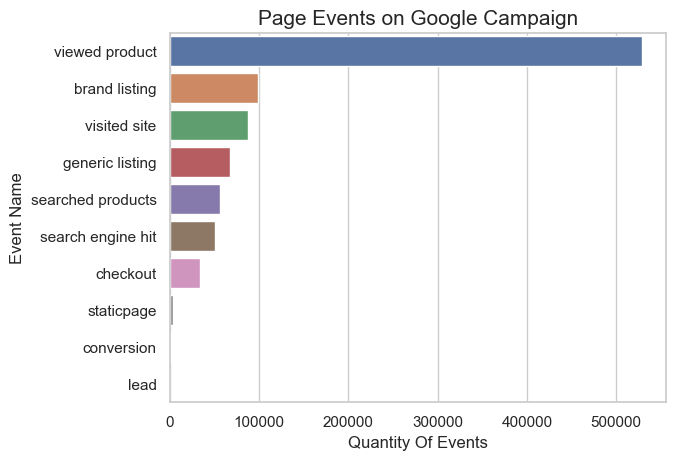

In [10]:
g = sns.barplot(x=event_counts.values, y=event_counts.index, orient='h')
g.set_title("Page Events on Google Campaign", fontsize=15)
g.set_xlabel("Quantity Of Events", fontsize=12)
g.set_ylabel("Event Name", fontsize=12)


In [11]:
checkout_vs_conversion = event_counts.drop(labels=['viewed product','staticpage','lead', 'brand listing', 'visited site','generic listing','searched products', 'search engine hit'])

Text(0,0.5,'Event Name')

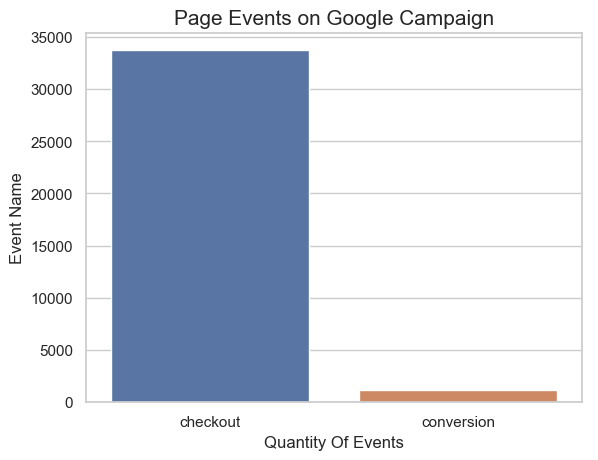

In [12]:
g = sns.barplot(x=checkout_vs_conversion.index, y=checkout_vs_conversion.values, orient='v')
g.set_title("Page Events on Google Campaign", fontsize=15)
g.set_xlabel("Quantity Of Events", fontsize=12)
g.set_ylabel("Event Name", fontsize=12)

-Personas que compraron

In [13]:
persons_google_conversion = (df_google.loc[df['event'] == 'conversion'])['person']
df_google_conversion = df.loc[df['person'].isin(persons_google_conversion)]
df_google_conversion = df_google_conversion.loc[df_google_conversion['event'] != 'ad campaign hit', :]
df_google_conversion.head(5)

,timestamp,event,person,url,sku,model,condition,storage,color,skus,search_term,staticpage,campaign_source,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
115,2018-01-18 00:19:28,generic listing,00204059,NaN,NaN,NaN,NaN,NaN,NaN,"3889,3853,3961,7071,7083,7028,1429,4033,12674,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,2018-01-18 00:19:39,visited site,00204059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Direct,New,Unknown,Unknown,Unknown,Computer,1024x600,Windows 7,Chrome 63.0
117,2018-01-31 16:54:28,generic listing,00204059,NaN,NaN,NaN,NaN,NaN,NaN,"3853,12730,4033,12674,6959,4056,11022,13670,33...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118,2018-01-31 16:54:29,visited site,00204059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Social,Returning,Unknown,Unknown,Unknown,Computer,1024x600,Windows 7,Chrome 63.0
120,2018-01-31 16:54:39,brand listing,00204059,NaN,NaN,NaN,NaN,NaN,NaN,"2691,2692,2694,2830,2693,2699,178,171,1302,283...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
event_counts_google = df_google_conversion['event'].value_counts()

In [15]:
df_google_conversion.describe()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,search_term,staticpage,campaign_source,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
count,118903,118903,118903,0.0,65246.0,65365,65246,65246,65246,34332,6796,1353,0.0,5080,12654,12654,12654,12654,12654,12654,12654,12654,12654
unique,109066,10,716,0.0,2470.0,187,5,8,61,10718,1426,12,0.0,3,7,2,491,40,8,4,55,44,115
top,2018-05-08 12:33:30,viewed product,6b07be7b,NaN,2830.0,iPhone 5s,Bom,16GB,Preto,"3371,6357,6371,2777,3191,6791,2718,2725,6399,3...",32gb,CustomerService,NaN,Google,Direct,Returning,Unknown,Sao Paulo,Brazil,Computer,360x640,Windows 7,Chrome 66.0
freq,8,60919,2711,NaN,397.0,4810,27493,25616,17982,77,162,901,NaN,4974,4583,12023,2423,3734,12208,7161,4107,3486,2383


Text(0,0.5,'Event Name')

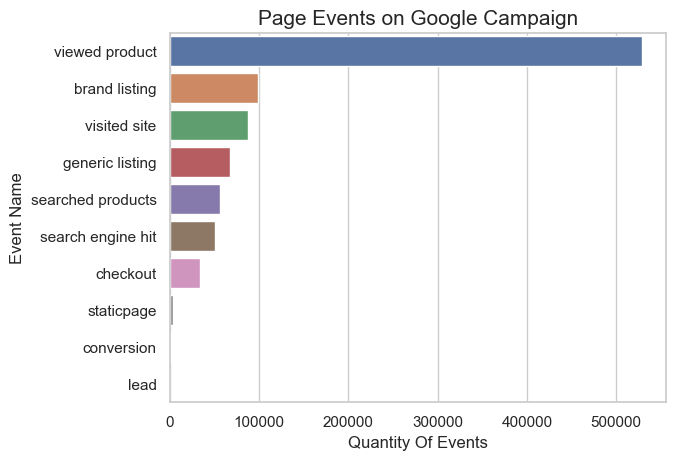

In [16]:
g = sns.barplot(x=event_counts.values, y=event_counts.index, orient='h')
g.set_title("Page Events on Google Campaign", fontsize=15)
g.set_xlabel("Quantity Of Events", fontsize=12)
g.set_ylabel("Event Name", fontsize=12)

In [17]:
df_google_conversion['sum']=1

In [18]:
event_sum = df_google_conversion.groupby('person').agg({'sum':'sum'})

In [19]:
event_sum.describe()

,sum
count,716.000000
mean,166.065642
std,228.854459
min,2.000000
25%,27.000000
50%,95.000000
75%,225.250000
max,2711.000000


In [20]:
checkout_vs_conversion = event_counts_google.drop(labels=['viewed product','staticpage','lead', 'brand listing', 'visited site','generic listing','searched products', 'search engine hit'])

Text(0,0.5,'Event Name')

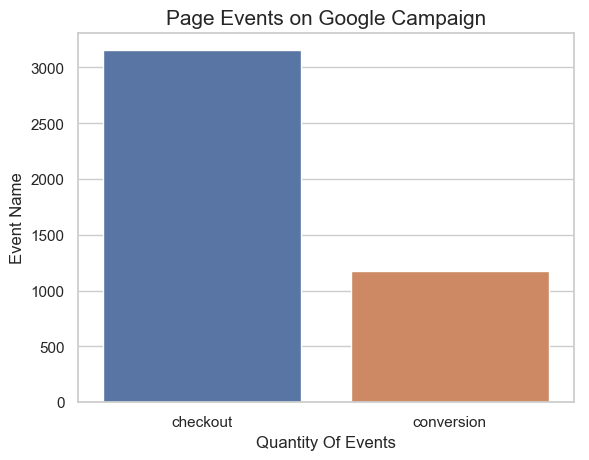

In [21]:
g = sns.barplot(x=checkout_vs_conversion.index, y=checkout_vs_conversion.values, orient='v')
g.set_title("Page Events on Google Campaign", fontsize=15)
g.set_xlabel("Quantity Of Events", fontsize=12)
g.set_ylabel("Event Name", fontsize=12)

## Smartphone

In [22]:
s_smartphone = (df.loc[df['device_type'] == 'Smartphone'])['screen_resolution']
df.iloc[360715]

timestamp                   2018-06-04 19:33:46
event                              visited site
person                                 5ecf68e8
url                                         NaN
sku                                         NaN
model                                       NaN
condition                                   NaN
storage                                     NaN
color                                       NaN
skus                                        NaN
search_term                                 NaN
staticpage                                  NaN
campaign_source                             NaN
search_engine                               NaN
channel                                    Paid
new_vs_returning                            New
city                                Sao Goncalo
region                           Rio de Janeiro
country                                  Brazil
device_type                          Smartphone
screen_resolution                     19

## lead

In [23]:
lead = (df.loc[df['event'] == 'lead'])['person']
df_lead_users = df.loc[df.person.isin(lead)]
df_lead_users.describe()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,search_term,staticpage,campaign_source,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
count,63887,63887,63887,3881,34000.0,34448,34000,34000,34000,17265,3060,410,3882,2283,5529,5529,5529,5529,5529,5529,5529,5529,5529
unique,56926,11,291,148,2117.0,181,5,8,61,6736,733,12,19,3,6,2,278,27,5,3,47,35,81
top,2018-03-21 01:11:52,viewed product,71492f2b,/,2830.0,iPhone 6,Bom,16GB,Preto,"3371,6357,6371,2777,3191,6791,2718,2725,6399,3...",J7,CustomerService,google,Google,Direct,Returning,Unknown,Sao Paulo,Brazil,Computer,360x640,Windows 7,Chrome 66.0
freq,6,32907,2771,1362,255.0,2558,14599,12286,8984,62,109,226,2258,2221,1830,5243,1006,1152,5376,2813,1949,1329,1032


In [24]:
event_counts = df_lead_users.event.value_counts()
checkout_vs_conversion = event_counts.drop(labels=['ad campaign hit', 'viewed product','staticpage','lead', 'brand listing', 'visited site','generic listing','searched products', 'search engine hit'])


Text(0,0.5,'Event Name')

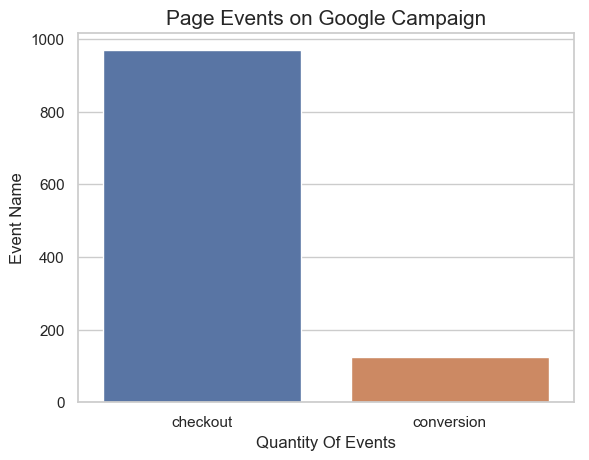

In [25]:
g = sns.barplot(x=checkout_vs_conversion.index, y=checkout_vs_conversion.values, orient='v')
g.set_title("Page Events on Google Campaign", fontsize=15)
g.set_xlabel("Quantity Of Events", fontsize=12)
g.set_ylabel("Event Name", fontsize=12)

## New Vs Returning

In [26]:
s_new = (df.loc[df.new_vs_returning == 'New'])['person']
df_new_that_returned = df.loc[df.person.isin(s_new)]
df_new_that_returned['new_vs_returning'].value_counts()

Returning    60479
New          26898
Name: new_vs_returning, dtype: int64

## Search engine hit con conversion

In [27]:
s_search = (df.loc[df['event'] == 'search engine hit'])['person']
df_search_engine_hit = df.loc[df['person'].isin(s_search)]
df_search_engine_hit.describe()


,timestamp,event,person,url,sku,model,condition,storage,color,skus,search_term,staticpage,campaign_source,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
count,832957,832957,832957,62463,462042.0,462417,462042,462042,462042,185702,41595,3036,62497,50957,67899,67899,67899,67899,67899,67899,67899,67899,67899
unique,663576,11,17205,219,3745.0,202,5,8,63,31808,5093,14,22,4,7,2,1733,78,38,4,219,110,264
top,2018-06-14 15:43:38,viewed product,6b07be7b,/,2830.0,iPhone 6,Bom,16GB,Preto,"2820,6706,6720,2750,6649,7251,6663,12604,7224,...",Iphone,CustomerService,google,Google,Paid,Returning,Unknown,Sao Paulo,Brazil,Computer,360x640,Windows 7,Chrome 66.0
freq,9,438604,2770,24545,3518.0,42070,195444,155702,107175,494,1002,1334,47022,50240,32785,50732,12149,19931,65551,33994,23389,15858,18025


In [28]:
df_search_engine_hit['event'].value_counts()

viewed product       438604
brand listing         82190
visited site          67899
ad campaign hit       62520
generic listing       56596
search engine hit     50957
searched products     47342
checkout              22545
staticpage             3036
conversion              893
lead                    375
Name: event, dtype: int64